# Predictions with full dataset

This notebook uses ALL variables, ALL datapoints to make predictions.

## Imports

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, \
                              VotingRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import xgboost as xg

from pycaret.regression import *


import pickle

## Read in data

In [80]:
train_df = pd.read_csv('../data/train.csv', index_col='id') #, skipinitialspace=True)
train_df.shape

(15289, 17)

In [81]:
train_df.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [82]:
train_df.columns = train_df.columns.str.lower()

In [83]:
train_df.dtypes

clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
maxofuppertrange        float64
minofuppertrange        float64
averageofuppertrange    float64
maxoflowertrange        float64
minoflowertrange        float64
averageoflowertrange    float64
rainingdays             float64
averagerainingdays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

In [84]:
test_df = pd.read_csv('../data/test.csv', index_col='id')
test_df.columns = test_df.columns.str.lower()
test_df.shape

(10194, 16)

___

## Feature Exploration / EDA

In [85]:
train_df.head()

,clonesize,honeybee,bumbles,andrena,osmia,maxofuppertrange,minofuppertrange,averageofuppertrange,maxoflowertrange,minoflowertrange,averageoflowertrange,rainingdays,averagerainingdays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [86]:
train_df.isna().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
maxofuppertrange        0
minofuppertrange        0
averageofuppertrange    0
maxoflowertrange        0
minoflowertrange        0
averageoflowertrange    0
rainingdays             0
averagerainingdays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

#### clonesize

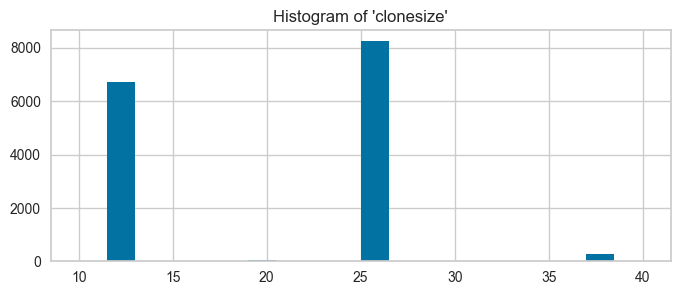

In [87]:
#histogram for general distribution visualization
plt.figure(figsize=(8,3))
plt.hist(train_df.clonesize, bins=20)
plt.title("Histogram of 'clonesize'");

In [88]:
#value counts for outlier identification
train_df.clonesize.value_counts()

25.0    8245
12.5    6717
37.5     265
20.0      56
10.0       4
40.0       2
Name: clonesize, dtype: int64

#### honeybee

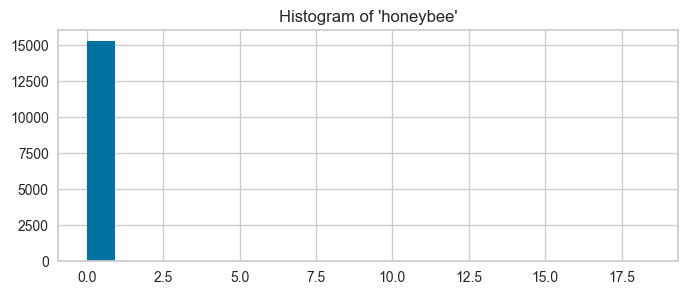

In [89]:
plt.figure(figsize=(8,3))
plt.hist(train_df.honeybee, bins=20)
plt.title("Histogram of 'honeybee'");

In [90]:
train_df.honeybee.value_counts()

0.500     7832
0.250     7285
0.750      110
0.537       38
0.000       16
18.430       5
6.640        3
Name: honeybee, dtype: int64

#### fruitset

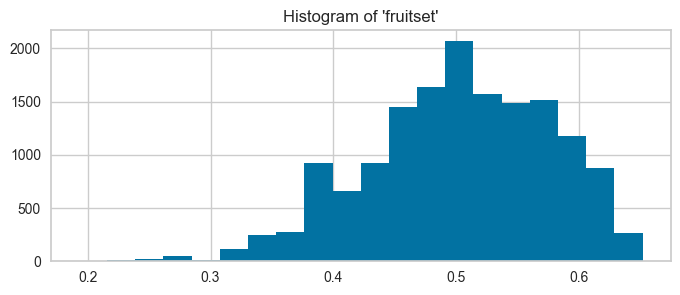

In [91]:
plt.figure(figsize=(8,3))
plt.hist(train_df.fruitset, bins=20)
plt.title("Histogram of 'fruitset'");

In [92]:
train_df.fruitset.value_counts()

0.583379    96
0.566319    81
0.534252    63
0.542170    60
0.481801    59
            ..
0.579622     1
0.456317     1
0.371190     1
0.434480     1
0.572099     1
Name: fruitset, Length: 1526, dtype: int64

#### seeds

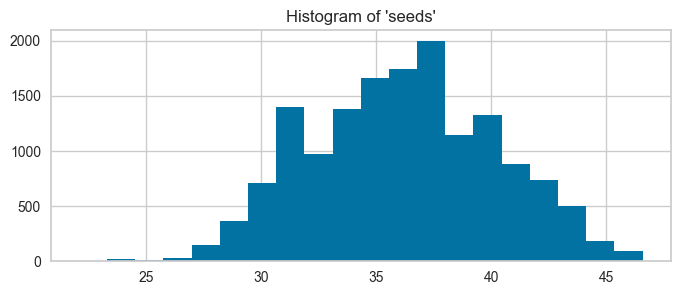

In [93]:
plt.figure(figsize=(8,3))
plt.hist(train_df.seeds, bins=20)
plt.title("Histogram of 'seeds'");

In [94]:
train_df.seeds.value_counts()

39.988734    96
37.966864    80
31.928816    71
36.976361    69
35.923314    61
             ..
43.081269     1
37.734534     1
41.843107     1
40.841356     1
27.873908     1
Name: seeds, Length: 2066, dtype: int64

#### rainingdays

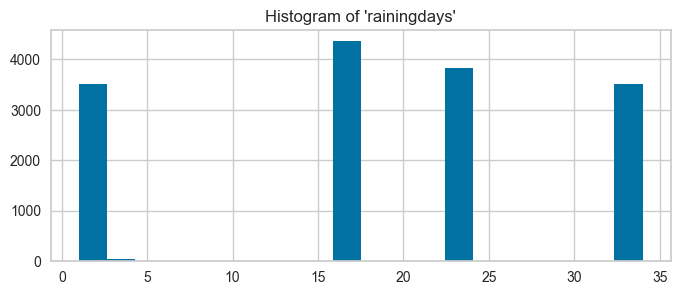

In [95]:
plt.figure(figsize=(8,3))
plt.hist(train_df.rainingdays, bins=20)
plt.title("Histogram of 'rainingdays'");

In [96]:
train_df.rainingdays.value_counts()

16.00    4361
24.00    3837
34.00    3521
1.00     3521
3.77       48
26.00       1
Name: rainingdays, dtype: int64

___

## Feature Engineering ? Drop cols?

In [97]:
train_df.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'maxofuppertrange', 'minofuppertrange', 'averageofuppertrange',
       'maxoflowertrange', 'minoflowertrange', 'averageoflowertrange',
       'rainingdays', 'averagerainingdays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [98]:
cols_to_drop = ['clonesize'
                , 'honeybee'
                , 'bumbles'
                , 'andrena'
                , 'osmia'
                , 'maxofuppertrange'
                , 'minofuppertrange'
                , 'averageofuppertrange'
                , 'maxoflowertrange'
                , 'minoflowertrange'
                , 'averageoflowertrange'
                # , 'rainingdays'
                , 'averagerainingdays'
                # , 'fruitset'
                , 'fruitmass'
                # , 'seeds'
                ]

In [99]:
select_df = train_df.drop(columns=cols_to_drop)
select_df.head()

,rainingdays,fruitset,seeds,yield
id,,,,
0,24.0,0.425011,32.460887,4476.81146
1,24.0,0.444908,33.858317,5548.12201
2,24.0,0.552927,38.341781,6869.77760
3,24.0,0.565976,39.467561,6880.77590
4,24.0,0.579677,40.484512,7479.93417


___

## Model Building

In [100]:
df = train_df
# df = feature_engineer(df)
df.head()

,clonesize,honeybee,bumbles,andrena,osmia,maxofuppertrange,minofuppertrange,averageofuppertrange,maxoflowertrange,minoflowertrange,averageoflowertrange,rainingdays,averagerainingdays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [101]:
X = df.drop('yield', axis=1)
y = df['yield']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regressor

In [103]:
lr = LinearRegression()

In [104]:
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8099181538889013
0.8104766968969612


### Decision Tree Regressor

In [105]:
tree = DecisionTreeRegressor(max_depth=10, min_samples_split=10, max_features=4)
# tree = DecisionTreeRegressor()

In [106]:
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.8481059862199811
0.7780416027301851


In [107]:
tree_params = {
    "max_depth": [None, 5, 8, 10],
    "min_samples_split": [5, 10, 15, 20],
    "max_features": [2, 3, 4, 5, 6],
}

rs_tree = RandomizedSearchCV(tree,
                      param_distributions = tree_params,
                      cv=5,
                      n_jobs=6,
                      n_iter=50)

rs_tree.fit(X_train, y_train)
rs_tree_train_score = rs_tree.score(X_train, y_train)
rs_tree_score = rs_tree.score(X_test, y_test)
print(f"Random Searched Decision Tree Score (Train): {rs_tree_train_score}")
print(f"Random Searched Decision Tree Score (Test): {rs_tree_score}")
print(f"Decision Tree Best Params: {rs_tree.best_params_}")

Random Searched Decision Tree Score (Train): 0.8306147425527691
Random Searched Decision Tree Score (Test): 0.7995050047867811
Decision Tree Best Params: {'min_samples_split': 20, 'max_features': 6, 'max_depth': 8}


### Random Forest Regressor

In [108]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, min_samples_split=2, max_features=4)
# rf = RandomForestRegressor()

In [109]:
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9614846892268812
0.7989361792737968


In [110]:
rf_params = {
    "n_estimators": [10, 1_500, 2_000],
    "max_depth": [None, 10, 20],
    "max_samples": [0.1, 0.5]
}

gs_rf = GridSearchCV(rf,
                      param_grid = rf_params,
                      cv=5,
                      n_jobs=6)

gs_rf.fit(X_train, y_train)
gs_rf_train_score = gs_rf.score(X_train, y_train)
gs_rf_score = gs_rf.score(X_test, y_test)
print(f"Grid Searched Random Forest Score (Train): {gs_rf_train_score}")
print(f"Grid Searched Random Forest Score (Test): {gs_rf_score}")
print(f"Random Forest Best Params: {gs_rf.best_params_}")

Grid Searched Random Forest Score (Train): 0.870558820572492
Grid Searched Random Forest Score (Test): 0.824409007914199
Random Forest Best Params: {'max_depth': 10, 'max_samples': 0.5, 'n_estimators': 2000}


In [111]:
rs_rf = RandomizedSearchCV(rf,
                      param_distributions = rf_params,
                      cv=5,
                      n_jobs=6,
                      n_iter=20)

rs_rf.fit(X_train, y_train)
rs_rf_train_score = rs_rf.score(X_train, y_train)
rs_rf_score = rs_rf.score(X_test, y_test)
print(f"Random Searched Random Forest Score (Train): {rs_rf_train_score}")
print(f"Random Searched Random Forest Score (Test): {rs_rf_score}")
print(f"Random Forest Best Params: {rs_rf.best_params_}")

Random Searched Random Forest Score (Train): 0.8703043278925577
Random Searched Random Forest Score (Test): 0.8242628519605228
Random Forest Best Params: {'n_estimators': 1500, 'max_samples': 0.5, 'max_depth': 10}


### Bagging Regressor

In [112]:
bag = BaggingRegressor()

In [113]:
bag.fit(X_train, y_train)
print(bag.score(X_train, y_train))
print(bag.score(X_test, y_test))

0.9623193070272335
0.7900414774931266


In [114]:
bag_params = {
    # "n_estimators": [5, 10, 20],
    "max_depth": [None, 5, 8, 10],
    "min_samples_split": [5, 10, 15, 20],
    # "max_samples": [5, 10, 20, 100],
    "max_features": [1, 2, 3, 4],
}

rs_bag = RandomizedSearchCV(tree,
                      param_distributions = bag_params,
                      cv=5,
                      n_jobs=6,
                      n_iter=50)

rs_bag.fit(X_train, y_train)
rs_bag_train_score = rs_bag.score(X_train, y_train)
rs_bag_score = rs_bag.score(X_test, y_test)
print(f"Random Searched Bagged Decision Tree Score (Train): {rs_bag_train_score}")
print(f"Random Searched Bagged Decision Tree Score (Test): {rs_bag_score}")
print(f"Bagged Decision Tree Best Params: {rs_bag.best_params_}")

Random Searched Bagged Decision Tree Score (Train): 0.8232618122404542
Random Searched Bagged Decision Tree Score (Test): 0.7842107197315743
Bagged Decision Tree Best Params: {'min_samples_split': 5, 'max_features': 4, 'max_depth': 8}


### AdaBoost Regressor

In [115]:
ada = AdaBoostRegressor()

In [116]:
ada.fit(X_train, y_train)
print(ada.score(X_train, y_train))
print(ada.score(X_test, y_test))

0.7190316707113976
0.7153363976032312


In [117]:
ada_params = {
    "n_estimators": [10, 20, 50, 100],
    "learning_rate": [0.01, 0.1, 1],
}

rs_ada = RandomizedSearchCV(ada,
                      param_distributions = ada_params,
                      cv=5,
                      n_jobs=6,
                      n_iter=50)

rs_ada.fit(X_train, y_train)
rs_ada_train_score = rs_ada.score(X_train, y_train)
rs_ada_score = rs_ada.score(X_test, y_test)
print(f"Random Searched Adaboost Score (Train): {rs_ada_train_score}")
print(f"Random Searched Adaboost Score (Test): {rs_ada_score}")
print(f"Adaboost Best Params: {rs_ada.best_params_}")

Random Searched Adaboost Score (Train): 0.7975834504592343
Random Searched Adaboost Score (Test): 0.8006547861483528
Adaboost Best Params: {'n_estimators': 20, 'learning_rate': 0.1}


### Gradient Boosting Regressor

In [118]:
gb = GradientBoostingRegressor(learning_rate=0.05, n_estimators=500,random_state=42)
# gb = GradientBoostingRegressor()

In [119]:
gb.fit(X_train, y_train)
print(gb.score(X_train, y_train))
print(gb.score(X_test, y_test))

0.8472589951109507
0.8252494142671271


In [120]:
gb_params = {
    "n_estimators": [10, 20, 50, 100, 200, 300, 400],
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1],
}

rs_gb = RandomizedSearchCV(gb,
                      param_distributions = gb_params,
                      cv=5,
                      n_jobs=6,
                      n_iter=20)

rs_gb.fit(X_train, y_train)
rs_gb_train_score = rs_gb.score(X_train, y_train)
rs_gb_score = rs_gb.score(X_test, y_test)
print(f"Random Searched Gradientboost Score (Train): {rs_gb_train_score}")
print(f"Random Searched Gradientboost Score (Test): {rs_gb_score}")
print(f"Gradientboost Best Params: {rs_gb.best_params_}")

Random Searched Gradientboost Score (Train): 0.8392617945130856
Random Searched Gradientboost Score (Test): 0.8254481161219985
Gradientboost Best Params: {'n_estimators': 300, 'learning_rate': 0.05}


___

### KNN Regressor

In [121]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [122]:
knn = KNeighborsRegressor(n_neighbors = 5)

In [123]:
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))


0.8293788914372683
0.7472037517704027


In [124]:
knn_params = {
    "n_neighbors": [5, 10, 20, 30, 40, 50],
    "weights": ['uniform', 'distance'],
}

rs_knn = RandomizedSearchCV(knn,
                      param_distributions = knn_params,
                      cv=5,
                      n_jobs=6,
                      n_iter=20)

rs_knn.fit(X_train, y_train)
rs_knn_train_score = rs_knn.score(X_train, y_train)
rs_knn_score = rs_knn.score(X_test, y_test)
print(f"Random Searched KNN Score (Train): {rs_knn_train_score}")
print(f"Random Searched KNN Score (Test): {rs_knn_score}")
print(f"KNN Best Params: {rs_knn.best_params_}")

Random Searched KNN Score (Train): 0.999994517331852
Random Searched KNN Score (Test): 0.7677358435145182
KNN Best Params: {'weights': 'distance', 'n_neighbors': 30}


### XGBoost Regressor

In [125]:
xgb = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123)

In [126]:
xgb.fit(X_train, y_train)
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))


0.8281530191191618
0.8026802685061007


In [127]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.5, 1],
    "gamma": [0, 0.1, 1],
    "max_depth": [2, 3, 4, 5, 6, 8, 10],
    "n_estimators": [3, 5, 10, 20, 100, 1_000],
}

rs_xgb = RandomizedSearchCV(xgb,
                      param_distributions = xgb_params,
                      cv=5,
                      n_jobs=6,
                      n_iter=50)

rs_xgb.fit(X_train, y_train)
rs_xgb_train_score = rs_knn.score(X_train, y_train)
rs_xgb_score = rs_knn.score(X_test, y_test)
print(f"Random Searched XGBoost Score (Train): {rs_xgb_train_score}")
print(f"Random Searched XGBoost Score (Test): {rs_xgb_score}")
print(f"XGBoost Best Params: {rs_xgb.best_params_}")

Random Searched XGBoost Score (Train): 0.999994517331852
Random Searched XGBoost Score (Test): 0.7677358435145182
XGBoost Best Params: {'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0.1}


# Model Ensembling

___

In [128]:
# "every" model = one of each type (random searched or not)

vc_all_base = VotingRegressor(estimators=[('lr', lr)
                                 , ('tree', tree)
                                #  , ('rf', rf)
                                #  , ('bag', bag)
                                #  , ('ada', ada)
                                 , ('gb', gb)
                                #  , ('knn', knn)
                                 , ('xgb', xgb)
                                #  , ('rs_tree', rs_tree)
                                 , ('rs_rf', rs_rf)
                                 , ('rs_bag', rs_bag)
                                 , ('rs_ada', rs_ada)
                                #  , ('rs_gb', rs_gb)
                                 , ('rs_knn', rs_knn)
                                #  , ('rs_xgb', rs_xgb)
                                 ], n_jobs=6)

In [129]:
vc = VotingRegressor(estimators=[('lr', lr)
                                #  , ('tree', tree)
                                #  , ('rf', rf)
                                #  , ('bag', bag)
                                #  , ('ada', ada)
                                #  , ('gb', gb)
                                #  , ('knn', knn)
                                #  , ('xgb', xgb)
                                #  , ('rs_tree', rs_tree)
                                 , ('rs_rf', rs_rf)
                                #  , ('rs_bag', rs_bag)
                                #  , ('rs_ada', rs_ada)
                                 , ('rs_gb', rs_gb)
                                #  , ('rs_knn', rs_knn)
                                #  , ('rs_xgb', rs_xgb)
                                 ], n_jobs=6)

In [130]:
# "Full"
vc_all_base.fit(X_train, y_train)
print(vc_all_base.score(X_train, y_train))
print(vc_all_base.score(X_test, y_test))

0.8832662274566198
0.8224183397314654


In [131]:
# select models only
vc.fit(X_train, y_train)
print(vc.score(X_train, y_train))
print(vc.score(X_test, y_test))

0.8450708515655847
0.8247498682881333


# Scores Summary

In [132]:
print("==============================================")
print(f"Linear regression Training score: {lr.score(X_train, y_train)}")
print(f"Linear regression Testing score: {lr.score(X_test, y_test)}")
print("==============================================")
print(f"Decision Tree regressor Training score: {tree.score(X_train, y_train)}")
print(f"Decision Tree regressor Testing score: {tree.score(X_test, y_test)}")
print(f"Random Searched Decision Tree Score (Train): {rs_tree_train_score}")
print(f"Random Searched Decision Tree Score (Test): {rs_tree_score}")
print("==============================================")
print(f"Random Forest regression Training score: {rf.score(X_train, y_train)}")
print(f"Random Forest regression Testing score: {rf.score(X_test, y_test)}")
print(f"Random Searched Random Forest Score (Train): {rs_rf_train_score}")
print(f"Random Searched Random Forest Score (Test): {rs_rf_score}")
print("==============================================")
print(f"Bagging regressor Training score: {bag.score(X_train, y_train)}")
print(f"Bagging regressor Testing score: {bag.score(X_test, y_test)}")
print(f"Random Searched Bagged Decision Tree Score (Train): {rs_bag_train_score}")
print(f"Random Searched Bagged Decision Tree Score (Test): {rs_bag_score}")
print("==============================================")
print(f"Adaboost regressor Training score: {ada.score(X_train, y_train)}")
print(f"Adaboost regressor Testing score: {ada.score(X_test, y_test)}")
print(f"Random Searched Adaboost Score (Train): {rs_ada_train_score}")
print(f"Random Searched Adaboost Score (Test): {rs_ada_score}")
print("==============================================")
print(f"GradientBoost regressor Training score: {gb.score(X_train, y_train)}")
print(f"GradientBoost Tree regressor Testing score: {gb.score(X_test, y_test)}")
print(f"Random Searched Gradientboost Score (Train): {rs_gb_train_score}")
print(f"Random Searched Gradientboost Score (Test): {rs_gb_score}")
print("==============================================")
print(f"KNN regressor Training score: {knn.score(X_train, y_train)}")
print(f"KNN Tree regressor Testing score: {knn.score(X_test, y_test)}")
print(f"Random Searched KNN Score (Train): {rs_knn_train_score}")
print(f"Random Searched KNN Score (Test): {rs_knn_score}")
print("==============================================")
print(f"XGBoost Training score: {xgb.score(X_train, y_train)}")
print(f"XGBoost Testing score: {xgb.score(X_test, y_test)}")
print(f"Random Searched XGBoost Score (Train): {rs_xgb_train_score}")
print(f"Random Searched XGBoost Score (Test): {rs_xgb_score}")
print("==============================================")
print(f"Ensembled Training score: {vc.score(X_train, y_train)}")
print(f"Ensembled Testing score: {vc.score(X_test, y_test)}")

Linear regression Training score: 0.8099181538889013
Linear regression Testing score: 0.8104766968969612
Decision Tree regressor Training score: 0.8481059862199811
Decision Tree regressor Testing score: 0.7780416027301851
Random Searched Decision Tree Score (Train): 0.8306147425527691
Random Searched Decision Tree Score (Test): 0.7995050047867811
Random Forest regression Training score: 0.9614846892268812
Random Forest regression Testing score: 0.7989361792737968
Random Searched Random Forest Score (Train): 0.8703043278925577
Random Searched Random Forest Score (Test): 0.8242628519605228
Bagging regressor Training score: 0.9623193070272335
Bagging regressor Testing score: 0.7900414774931266
Random Searched Bagged Decision Tree Score (Train): 0.8232618122404542
Random Searched Bagged Decision Tree Score (Test): 0.7842107197315743
Adaboost regressor Training score: 0.7190316707113976
Adaboost regressor Testing score: 0.7153363976032312
Random Searched Adaboost Score (Train): 0.7975834504

#### PyCaret

In [133]:
# import pycaret
# pycaret.__version__

In [134]:
# from pycaret.regression import *
s = setup(train_df, target = 'yield', session_id = 123)

,Description,Value
0,Session id,123
1,Target,yield
2,Target type,Regression
3,Original data shape,"(15289, 17)"
4,Transformed data shape,"(15289, 17)"
5,Transformed train set shape,"(10702, 17)"
6,Transformed test set shape,"(4587, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [135]:
exp = RegressionExperiment()

In [136]:
# init setup on exp
exp.setup(train_df, target = 'yield', session_id = 123)

,Description,Value
0,Session id,123
1,Target,yield
2,Target type,Regression
3,Original data shape,"(15289, 17)"
4,Transformed data shape,"(15289, 17)"
5,Transformed train set shape,"(10702, 17)"
6,Transformed test set shape,"(4587, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [137]:
# compare baseline models
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:58:10
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [138]:
results = pull()
results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,355.8612,3.196117e+05,564.4388,0.8205,0.1020,0.0630,0.066
catboost,CatBoost Regressor,358.5941,3.223109e+05,566.8106,0.8190,0.1029,0.0636,0.135
lightgbm,Light Gradient Boosting Machine,357.8139,3.237920e+05,568.1761,0.8183,0.1031,0.0634,0.153
rf,Random Forest Regressor,369.5804,3.418965e+05,583.8863,0.8080,0.1056,0.0655,0.101
ridge,Ridge Regression,376.7938,3.483618e+05,589.2342,0.8045,0.1087,0.0675,0.062
llar,Lasso Least Angle Regression,380.5148,3.483527e+05,589.4500,0.8045,0.1072,0.0682,0.059
lasso,Lasso Regression,381.0311,3.486859e+05,589.7616,0.8043,0.1073,0.0682,0.255
xgboost,Extreme Gradient Boosting,376.2071,3.532137e+05,593.4011,0.8017,0.1080,0.0669,0.063
et,Extra Trees Regressor,383.7303,3.538011e+05,593.9745,0.8013,0.1073,0.0679,0.115
br,Bayesian Ridge,374.8673,3.944851e+05,617.5927,0.7782,0.1065,0.0667,0.057


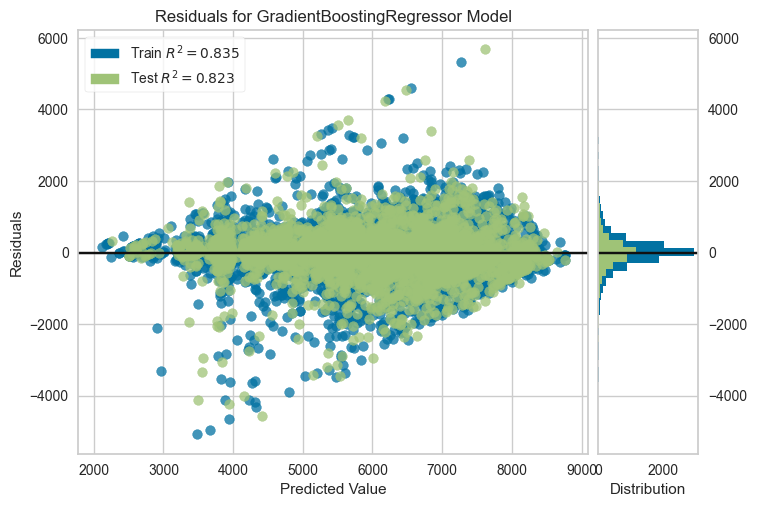

In [139]:
# plot residuals
plot_model(best, plot = 'residuals')

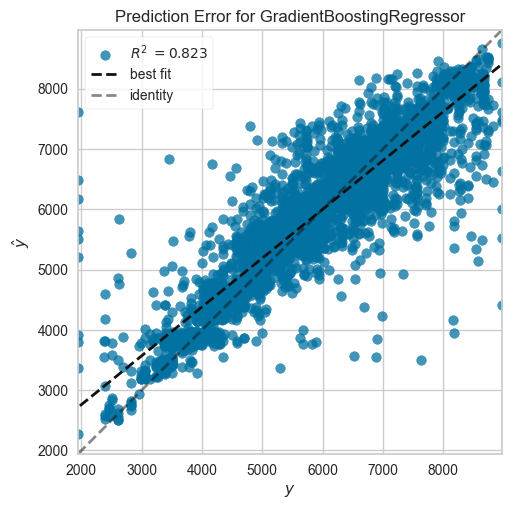

In [140]:
# plot error
plot_model(best, plot = 'error')

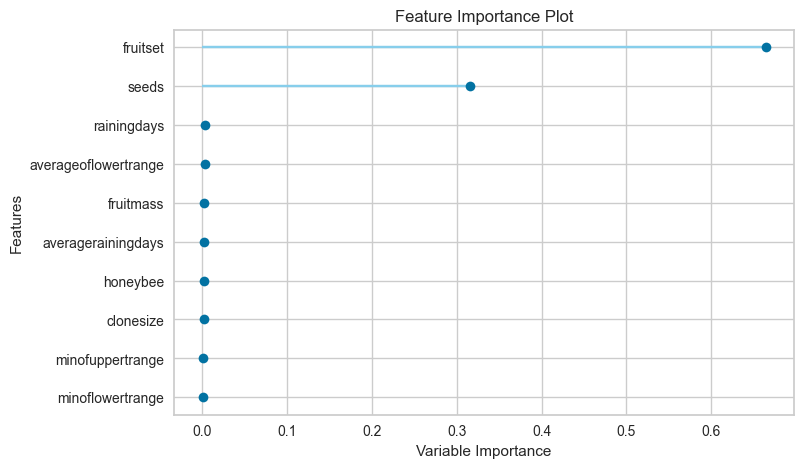

In [141]:
# plot feature importance
plot_model(best, plot = 'feature')

In [142]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,357.6762,318325.4837,564.2034,0.8229,0.1037,0.0637


In [143]:
# show predictions df
holdout_pred.head()

,clonesize,honeybee,bumbles,andrena,osmia,maxofuppertrange,minofuppertrange,averageofuppertrange,maxoflowertrange,minoflowertrange,averageoflowertrange,rainingdays,averagerainingdays,fruitset,fruitmass,seeds,yield,prediction_label
id,,,,,,,,,,,,,,,,,,
12552,25.0,0.50,0.25,0.75,0.63,69.699997,42.099998,58.200001,50.200001,24.299999,41.200001,24.0,0.39,0.483873,0.417947,34.207397,5381.272461,5742.356617
11427,25.0,0.50,0.25,0.63,0.50,86.000000,52.000000,71.900002,62.000000,30.000000,50.799999,24.0,0.39,0.432912,0.417909,32.789375,4278.763184,4676.180172
1754,25.0,0.50,0.25,0.38,0.75,69.699997,42.099998,58.200001,50.200001,24.299999,41.200001,34.0,0.56,0.350993,0.377566,28.438202,3511.537842,3752.640197
7078,12.5,0.25,0.38,0.38,0.63,86.000000,52.000000,71.900002,62.000000,30.000000,50.799999,16.0,0.26,0.598061,0.492693,41.219212,7241.370605,7451.651066
9502,25.0,0.25,0.25,0.25,0.25,69.699997,42.099998,58.200001,50.200001,24.299999,41.200001,34.0,0.56,0.422548,0.426437,33.364994,4234.868652,4692.743904


In [144]:
# copy data and drop yield

new_data = train_df.copy()
new_data.drop('yield', axis=1, inplace=True)
new_data.head()

,clonesize,honeybee,bumbles,andrena,osmia,maxofuppertrange,minofuppertrange,averageofuppertrange,maxoflowertrange,minoflowertrange,averageoflowertrange,rainingdays,averagerainingdays,fruitset,fruitmass,seeds
id,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512


In [145]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,clonesize,honeybee,bumbles,andrena,osmia,maxofuppertrange,minofuppertrange,averageofuppertrange,maxoflowertrange,minoflowertrange,averageoflowertrange,rainingdays,averagerainingdays,fruitset,fruitmass,seeds,prediction_label
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.699997,42.099998,58.200001,50.200001,24.299999,41.200001,24.0,0.39,0.425011,0.417545,32.460888,4709.525261
1,25.0,0.50,0.25,0.50,0.50,69.699997,42.099998,58.200001,50.200001,24.299999,41.200001,24.0,0.39,0.444908,0.422051,33.858318,5166.903048
2,12.5,0.25,0.25,0.63,0.63,86.000000,52.000000,71.900002,62.000000,30.000000,50.799999,24.0,0.39,0.552927,0.470853,38.341782,6689.150784
3,12.5,0.25,0.25,0.63,0.50,77.400002,46.799999,64.699997,55.799999,27.000000,45.799999,24.0,0.39,0.565977,0.478137,39.467560,6899.484156
4,25.0,0.50,0.25,0.63,0.63,77.400002,46.799999,64.699997,55.799999,27.000000,45.799999,24.0,0.39,0.579677,0.494165,40.484512,7098.212301


In [146]:
# save pipeline
save_model(best, 'blueberries_pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\panda\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['clonesize', 'honeybee', 'bumbles',
                                              'andrena', 'osmia',
                                              'maxofuppertrange',
                                              'minofuppertrange',
                                              'averageofuppertrange',
                                              'maxoflowertrange',
                                              'minoflowertrange',
                                              'averageoflowertrange',
                                              'rainingdays',
                                              'averagerainingdays', 'fruitset',
                                              'fruitmass', 'seeds'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
          

In [147]:
# load pipeline
loaded_best_pipeline = load_model('blueberries_pycaret')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\panda\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['clonesize', 'honeybee', 'bumbles',
                                             'andrena', 'osmia',
                                             'maxofuppertrange',
                                             'minofuppertrange',
                                             'averageofuppertrange',
                                             'maxoflowertrange',
                                             'minoflowertrange',
                                             'averageoflowertrange',
                                             'rainingdays',
                                             'averagerainingdays', 'fruitset',
                                             'fruitmass', 'seeds'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model', GradientBoostingRegressor(random_state=123))])

___

## Creating Predictions

___

#### Re-fit to full Training dataset (no Train-Test-Split)

In [148]:
vc.fit(X, y)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rs_rf',
                             RandomizedSearchCV(cv=5,
                                                estimator=RandomForestRegressor(max_depth=20,
                                                                                max_features=4,
                                                                                n_estimators=10),
                                                n_iter=20, n_jobs=6,
                                                param_distributions={'max_depth': [None,
                                                                                   10,
                                                                                   20],
                                                                     'max_samples': [0.1,
                                                                                     0.5],
                                                                     'n_estimators': [10,
                                                                                      1500,
                                                                                      2000]})),
                            ('rs_gb',
                             RandomizedSearchCV(cv=5,
                                                estimator=GradientBoostingRegressor(learning_rate=0.05,
                                                                                    n_estimators=500,
                                                                                    random_state=42),
                                                n_iter=20, n_jobs=6,
                                                param_distributions={'learning_rate': [0.01,
                                                                                       0.05,
                                                                                       0.1,
                                                                                       0.5,
                                                                                       1],
                                                                     'n_estimators': [10,
                                                                                      20,
                                                                                      50,
                                                                                      100,
                                                                                      200,
                                                                                      300,
                                                                                      400]}))],
                n_jobs=6)

In [149]:
vc.score(X, y)

0.8450783060492558

#### Testing

In [150]:
contest_data = pd.read_csv('../data/test.csv', index_col='id')
contest_data.columns = contest_data.columns.str.lower()
contest_data.head()

,clonesize,honeybee,bumbles,andrena,osmia,maxofuppertrange,minofuppertrange,averageofuppertrange,maxoflowertrange,minoflowertrange,averageoflowertrange,rainingdays,averagerainingdays,fruitset,fruitmass,seeds
id,,,,,,,,,,,,,,,,
15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


#### Predict on contest data (My ensembled model)

In [151]:
contest_submission_ensemble = pd.DataFrame(vc.predict(contest_data), columns=['yield'])
contest_submission_ensemble.index = contest_data.index
contest_submission_ensemble.head()

,yield
id,
15289,4289.590777
15290,6149.326291
15291,7236.884670
15292,4822.505935
15293,3905.210080


In [152]:

pd.DataFrame(contest_submission_ensemble).to_csv('../data/contest_submission_ensemble.csv', index=False)

#### Predict on contest data (PyCaret)

In [153]:
predictions_contest = predict_model(best, data = contest_data)
predictions_contest.head()

,clonesize,honeybee,bumbles,andrena,osmia,maxofuppertrange,minofuppertrange,averageofuppertrange,maxoflowertrange,minoflowertrange,averageoflowertrange,rainingdays,averagerainingdays,fruitset,fruitmass,seeds,prediction_label
id,,,,,,,,,,,,,,,,,
15289,25.0,0.25,0.25,0.25,0.25,86.000000,52.000000,71.900002,62.000000,30.0,50.799999,24.0,0.39,0.399367,0.408088,31.394569,4268.427204
15290,12.5,0.25,0.25,0.75,0.63,94.599998,57.200001,79.000000,68.199997,33.0,55.900002,1.0,0.10,0.488048,0.442866,36.846958,6104.860839
15291,12.5,0.25,0.25,0.63,0.63,86.000000,52.000000,71.900002,62.000000,30.0,50.799999,16.0,0.26,0.583379,0.487057,40.037643,7189.988130
15292,25.0,0.50,0.38,0.38,0.63,86.000000,52.000000,71.900002,62.000000,30.0,50.799999,16.0,0.26,0.433014,0.422847,33.116093,4774.763357
15293,37.5,0.75,0.25,0.25,0.25,94.599998,57.200001,79.000000,68.199997,33.0,55.900002,24.0,0.39,0.360996,0.388860,29.558020,3790.457785


In [154]:
contest_submission_pycaret = predictions_contest[['prediction_label']]
contest_submission_pycaret.columns = ['yield']
contest_submission_pycaret.head()

,yield
id,
15289,4268.427204
15290,6104.860839
15291,7189.988130
15292,4774.763357
15293,3790.457785


In [155]:
contest_submission_pycaret.to_csv('../data/contest_submission_pycaret.csv')